In [ ]:
import os
import numpy as np
import shutil
import random
import pandas as pd
from PIL import Image
#importing libraries to sample the images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#Importing the tensorflow and keras libraries 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPool2D, Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import MobileNetV2
import pathlib
 

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

In [ ]:
root_dir = r"C:\Users\HP\Downloads\autism"
autistic_dir = r"C:\Users\HP\Downloads\autism\train\autistic"
nonautistic_dir = r"C:\Users\HP\Downloads\autism\train\non_autistic"
test_dir=r"C:\Users\HP\Downloads\autism\test"
autistic_dir_names = os.listdir(autistic_dir)
nonautistic_dir_names = os.listdir(nonautistic_dir)
train_dir=r"C:\Users\HP\Downloads\autism\train"
val_dir=r"C:\Users\HP\Downloads\autism\valid"

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Making a list of Images names according to the classes with  train and val sets 
train = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/autism/train',target_size=(256,256), batch_size=16)
val = val_datagen.flow_from_directory(directory='/content/drive/MyDrive/autism/valid',target_size=(256,256), batch_size=16)
test = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/autism/test',target_size=(256,256), batch_size=16)


# train_autistic_dir_names=os.listdir(train_dir+'/autistic')
# train_nonautistic_dir_names=os.listdir(train_dir+'/non_autistic')
# val_autistic_dir_names=os.listdir(val_dir+'/autistic')
# val_nonautistic_dir_names=os.listdir(val_dir+'/non_autistic')
# print("Autistic:")
# print("-----------------")
# print(train_autistic_dir_names[:5])
# print('\n')
# print("Non Autistic:")
# print("-----------------")
# print(train_nonautistic_dir_names[:5])

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
t_img,label=train.next()

In [ ]:
from PIL import Image

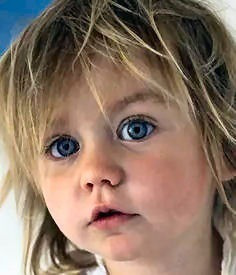

In [ ]:
Image.open(r"/content/drive/MyDrive/autism/train/autistic/0047.jpg")


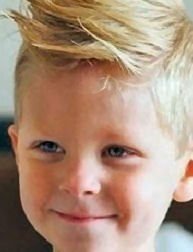

In [ ]:
Image.open(r"/content/drive/MyDrive/autism/train/non_autistic/0054.jpg")


In [ ]:
t_img.shape

(16, 256, 256, 3)

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow.keras

In [ ]:
base_model = ResNet50(input_shape=(256,256,3),include_top=False)


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
x = Flatten()(base_model.output)
x=Dense(units=2,activation='sigmoid')(x)
#creating our model
model = Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer = 'adam',
              loss = tensorflow.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es = EarlyStopping(monitor = 'val_accuracy',min_delta=0.01,patience=3,verbose=1)

In [ ]:
# #model check point
mc = ModelCheckpoint(filepath="resnet50.h5",
                      monitor='val_accuracy',
                      min_delta=0.01,
                      patience=3,
                      verbose=1,
                      save_best_only=True)
##call back
 cb = [es,mc]

In [ ]:
his=model.fit(train,
              #steps_per_epoch=16,
              epochs=50,
              verbose=1,
              #callbacks=cb,
              validation_data=val,
              validation_steps=4)

Epoch 1/50
158/158 [==============================] - 579s 4s/step - loss: 6.6162 - accuracy: 0.6940 - val_loss: 7.0944 - val_accuracy: 0.7500
Epoch 2/50
158/158 [==============================] - 569s 4s/step - loss: 6.5967 - accuracy: 0.7435 - val_loss: 4.8638 - val_accuracy: 0.8125
Epoch 3/50
158/158 [==============================] - 571s 4s/step - loss: 5.7237 - accuracy: 0.7886 - val_loss: 7.7343 - val_accuracy: 0.7656
Epoch 4/50
158/158 [==============================] - 573s 4s/step - loss: 5.5630 - accuracy: 0.7866 - val_loss: 7.0675 - val_accuracy: 0.8125
Epoch 5/50
158/158 [==============================] - 568s 4s/step - loss: 5.7061 - accuracy: 0.8036 - val_loss: 9.0485 - val_accuracy: 0.7656
Epoch 6/50
158/158 [==============================] - 568s 4s/step - loss: 6.3028 - accuracy: 0.8032 - val_loss: 10.8530 - val_accuracy: 0.6719
Epoch 7/50
158/158 [==============================] - 577s 4s/step - loss: 5.8154 - accuracy: 0.8262 - val_loss: 11.8807 - val_accuracy: 0.70

In [ ]:
h=his.history
h.keys()

In [ ]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = h['accuracy']
val_acc = h['val_accuracy']
loss = h['loss']
val_loss = h['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = h['accuracy']
val_acc = h['val_accuracy']
loss = h['loss']
val_loss = h['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()